In [248]:
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline
pd.set_option('display.max_columns', None)
df = pd.read_csv('df_arabica_clean.csv')
#sweetness, defects, clean cup and uniformital all 10 for every row
# df = df.drop(columns=['ICO Number', 'Unnamed: 0', 'ID', 'Sweetness', 'Clean Cup', 'Defects', 'Uniformity'])
df = df.fillna('N/A')
df.head()

,Unnamed: 0,ID,Country of Origin,Farm Name,Lot Number,Mill,ICO Number,Company,Altitude,Region,Producer,Number of Bags,Bag Weight,In-Country Partner,Harvest Year,Grading Date,Owner,Variety,Status,Processing Method,Aroma,Flavor,Aftertaste,Acidity,Body,Balance,Uniformity,Clean Cup,Sweetness,Overall,Defects,Total Cup Points,Moisture Percentage,Category One Defects,Quakers,Color,Category Two Defects,Expiration,Certification Body,Certification Address,Certification Contact
0,0,0,Colombia,Finca El Paraiso,CQU2022015,Finca El Paraiso,N/A,Coffee Quality Union,1700-1930,"Piendamo,Cauca",Diego Samuel Bermudez,1,35 kg,Japan Coffee Exchange,2021 / 2022,"September 21st, 2022",Coffee Quality Union,Castillo,Completed,Double Anaerobic Washed,8.58,8.50,8.42,8.58,8.25,8.42,10.0,10.0,10.0,8.58,0.0,89.33,11.8,0,0,green,3,"September 21st, 2023",Japan Coffee Exchange,"〒413-0002 静岡県熱海市伊豆山１１７３−５８ 1173-58 Izusan, Ata...",松澤 宏樹 Koju Matsuzawa - +81(0)9085642901
1,1,1,Taiwan,Royal Bean Geisha Estate,"The 2022 Pacific Rim Coffee Summit,T037",Royal Bean Geisha Estate,N/A,Taiwan Coffee Laboratory,1200,Chiayi,曾福森,1,80 kg,Taiwan Coffee Laboratory 台灣咖啡研究室,2021 / 2022,"November 15th, 2022",Taiwan Coffee Laboratory 台灣咖啡研究室,Gesha,Completed,Washed / Wet,8.50,8.50,7.92,8.00,7.92,8.25,10.0,10.0,10.0,8.50,0.0,87.58,10.5,0,0,blue-green,0,"November 15th, 2023",Taiwan Coffee Laboratory 台灣咖啡研究室,"QAHWAH CO., LTD 4F, No. 225, Sec. 3, Beixin Rd...","Lin, Jen-An Neil 林仁安 - 886-289116612"
2,2,2,Laos,OKLAO coffee farms,"The 2022 Pacific Rim Coffee Summit,LA01",oklao coffee processing plant,N/A,Taiwan Coffee Laboratory,1300,Laos Borofen Plateau,WU TAO CHI,19,25 kg,Taiwan Coffee Laboratory 台灣咖啡研究室,2021 / 2022,"November 15th, 2022",Taiwan Coffee Laboratory 台灣咖啡研究室,Java,Completed,Semi Washed,8.33,8.42,8.08,8.17,7.92,8.17,10.0,10.0,10.0,8.33,0.0,87.42,10.4,0,0,yellowish,2,"November 15th, 2023",Taiwan Coffee Laboratory 台灣咖啡研究室,"QAHWAH CO., LTD 4F, No. 225, Sec. 3, Beixin Rd...","Lin, Jen-An Neil 林仁安 - 886-289116612"
3,3,3,Costa Rica,La Cumbre,CQU2022017,La Montana Tarrazu MIll,N/A,Coffee Quality Union,1900,"Los Santos,Tarrazu",Santa Maria de Dota,1,22 kg,Japan Coffee Exchange,2022,"September 21st, 2022",Coffee Quality Union,Gesha,Completed,Washed / Wet,8.08,8.17,8.17,8.25,8.17,8.08,10.0,10.0,10.0,8.25,0.0,87.17,11.8,0,0,green,0,"September 21st, 2023",Japan Coffee Exchange,"〒413-0002 静岡県熱海市伊豆山１１７３−５８ 1173-58 Izusan, Ata...",松澤 宏樹 Koju Matsuzawa - +81(0)9085642901
4,4,4,Colombia,Finca Santuario,CQU2023002,Finca Santuario,N/A,Coffee Quality Union,1850-2100,"Popayan,Cauca",Camilo Merizalde,2,24 kg,Japan Coffee Exchange,2022,"March 6th, 2023",Coffee Quality Union,Red Bourbon,Completed,"Honey,Mossto",8.33,8.33,8.08,8.25,7.92,7.92,10.0,10.0,10.0,8.25,0.0,87.08,11.6,0,2,yellow-green,2,"March 5th, 2024",Japan Coffee Exchange,"〒413-0002 静岡県熱海市伊豆山１１７３−５８ 1173-58 Izusan, Ata...",松澤 宏樹 Koju Matsuzawa - +81(0)9085642901


In [249]:
# corr = df.corr()

# corr.info()

# sns.heatmap(corr)

In [250]:
flavMetrics = ['Aroma', 'Flavor', 'Aftertaste', 'Acidity', 'Body', 'Balance']
keepCols = ['Aroma', 'Flavor', 'Aftertaste', 'Acidity', 'Body', 'Balance', 'Country of Origin', 'Moisture Percentage']
scoreCols = ['Aroma', 'Flavor', 'Aftertaste', 'Acidity', 'Body', 'Balance']
print(keepCols)
df = df[keepCols]

# converts scores out of 10 to 0-1 scale
for i in scoreCols:
    df[i] = df[i].apply(lambda x: x / 10.0)

# converts moisture percentage to 0-1 scale
df['Moisture Percentage'] = df['Moisture Percentage'].apply(lambda x: x / 100.0)

X = df.drop(columns='Country of Origin')
y = df['Country of Origin']
df.head()

['Aroma', 'Flavor', 'Aftertaste', 'Acidity', 'Body', 'Balance', 'Country of Origin']


,Aroma,Flavor,Aftertaste,Acidity,Body,Balance,Country of Origin
0,0.858,0.850,0.842,0.858,0.825,0.842,Colombia
1,0.850,0.850,0.792,0.800,0.792,0.825,Taiwan
2,0.833,0.842,0.808,0.817,0.792,0.817,Laos
3,0.808,0.817,0.817,0.825,0.817,0.808,Costa Rica
4,0.833,0.833,0.808,0.825,0.792,0.792,Colombia


In [251]:
# sns.pairplot(df, hue='Country of Origin')

In [252]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=12)


/Users/derek/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/derek/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/derek/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/derek/opt/anaconda3/lib/python3.9/site-packages/sklearn/met

,accuracy,precision,recall,f1
neighbors,,,,
1,0.288462,0.407151,0.288462,0.311786
2,0.211538,0.405266,0.211538,0.254941
3,0.269231,0.395513,0.269231,0.299206
4,0.326923,0.419872,0.326923,0.343490
5,0.384615,0.414423,0.384615,0.372793
6,0.403846,0.319906,0.403846,0.349607
7,0.403846,0.376901,0.403846,0.360851
8,0.365385,0.281228,0.365385,0.311221
9,0.346154,0.272221,0.346154,0.299101


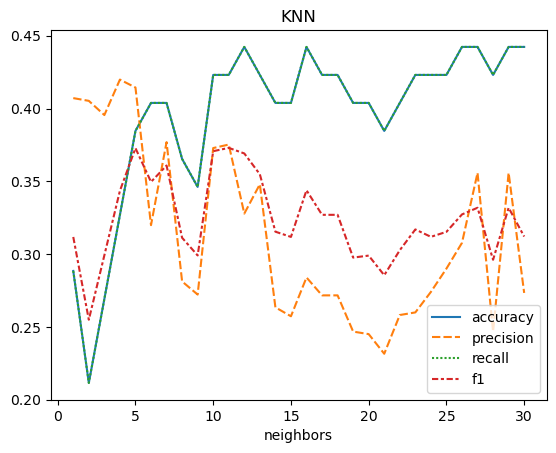

In [253]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
neighbors = []
accs = []
pres = []
recs = []
f1s = []

for i in range(1, 31):
    knn = KNeighborsClassifier(n_neighbors=i)

    knn.fit(X_train, y_train)

    pred = knn.predict(X_test)
    neighbors.append(i)
    accs.append(accuracy_score(y_test, pred))
    pres.append(precision_score(y_test, pred, average='weighted'))
    recs.append(recall_score(y_test, pred, average='weighted'))
    f1s.append(f1_score(y_test, pred, average='weighted'))

metricsdf = pd.DataFrame(list(zip(neighbors, accs, pres, recs, f1s)), columns=['neighbors', 'accuracy', 'precision', 'recall', 'f1'])

metricsdf = metricsdf.set_index('neighbors')
sns.lineplot(data=metricsdf).set(title='KNN')


max_acc = max(accs)

metricsdf

/Users/derek/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/derek/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/derek/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/derek/opt/anaconda3/lib/python3.9/site-packages/sklearn/met

,accuracy,precision,recall,f1
estimators,,,,
1,0.211538,0.265385,0.211538,0.216651
11,0.269231,0.300824,0.269231,0.277267
21,0.269231,0.268725,0.269231,0.267780
31,0.288462,0.310684,0.288462,0.292796
41,0.269231,0.234595,0.269231,0.249464
51,0.326923,0.272070,0.326923,0.296789
61,0.326923,0.337935,0.326923,0.312239
71,0.269231,0.233745,0.269231,0.248882
81,0.288462,0.328846,0.288462,0.290232


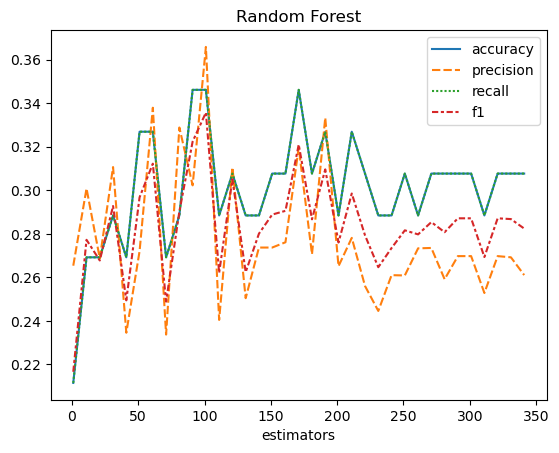

In [254]:
from sklearn.ensemble import RandomForestClassifier

ests = []
accs = []
pres = []
recs = []
f1s = []

for i in range(1, 351, 10):
    rfc = RandomForestClassifier(n_estimators=i)

    rfc.fit(X_train, y_train)

    pred = rfc.predict(X_test)

    ests.append(i)
    accs.append(accuracy_score(y_test, pred))
    pres.append(precision_score(y_test, pred, average='weighted'))
    recs.append(recall_score(y_test, pred, average='weighted'))
    f1s.append(f1_score(y_test, pred, average='weighted'))

metricsdf = pd.DataFrame(list(zip(ests, accs, pres, recs, f1s)), columns=['estimators', 'accuracy', 'precision', 'recall', 'f1'])

metricsdf = metricsdf.set_index('estimators')
sns.lineplot(data=metricsdf).set(title='Random Forest')

metricsdf

In [255]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
svc_model = SVC()

param_grid = {
    'C': [1, 5, 10, 50, 100],
    'kernel': ['rbf', 'poly', 'sigmoid']
}

search = GridSearchCV(estimator=svc_model, param_grid=param_grid, scoring='f1', cv=5, verbose=True)

search.fit(X_train, y_train)
search.best_params_


Fitting 5 folds for each of 15 candidates, totalling 75 fits


/Users/derek/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
/Users/derek/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/derek/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/derek/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 234, in __call__
    return self._score(
  File "/Users/derek/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 282, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "/Users/derek/opt/anaconda3/lib/python3.

KeyboardInterrupt: 

In [ ]:
svc_model = SVC(C=1, kernel='rbf')

svc_model.fit(X_train, y_train)

pred = svc_model.predict(X_test)

acc = accuracy_score(y_test, pred)
prec = precision_score(y_test, pred, average='weighted')
rec = recall_score(y_test, pred, average='weighted')
f1 = f1_score(y_test, pred, average='weighted')

print(f"Accuracy: {acc}, Precision: {prec}, Recall: {rec}, F1: {f1}")

Accuracy: 0.34615384615384615, Precision: 0.11982248520710059, Recall: 0.34615384615384615, F1: 0.178021978021978


/Users/derek/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
